In [1]:
!pip install kaggle


In [4]:
from google.colab import files

1.  Go to your Kaggle account settings.
2.  Under the "API" section, click "Create New API Token". This will download a `kaggle.json` file to your computer.
3.  Run the code below to upload the `kaggle.json` file.

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suhayldastager12","key":"cda2e26fa587b9a05b9ee33641c25cca"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d volpatto/coffee-quality-database-from-cqi
!unzip coffee-quality-database-from-cqi.zip


Dataset URL: https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi
License(s): DbCL-1.0
  0% 0.00/254k [00:00<?, ?B/s]
100% 254k/254k [00:00<00:00, 626MB/s]
Archive:  coffee-quality-database-from-cqi.zip
  inflating: arabica_data_cleaned.csv  
  inflating: merged_data_cleaned.csv  
  inflating: robusta_data_cleaned.csv  


In [8]:
import pandas as pd

# Load Arabica dataset
df = pd.read_csv("arabica_data_cleaned.csv")

# Quick look
print(df.shape)
print(df.info())
df.head()


(1311, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [10]:
# Keep only useful columns
df = df[['Country.of.Origin','Aroma','Flavor','Acidity','Body','Total.Cup.Points']]

# Drop missing values
df = df.dropna()

# Reset index
df = df.reset_index(drop=True)

df.head()

,Country.of.Origin,Aroma,Flavor,Acidity,Body,Total.Cup.Points
0,Ethiopia,8.67,8.83,8.75,8.50,90.58
1,Ethiopia,8.75,8.67,8.58,8.42,89.92
2,Guatemala,8.42,8.50,8.42,8.33,89.75
3,Ethiopia,8.17,8.58,8.42,8.50,89.00
4,Ethiopia,8.25,8.50,8.50,8.42,88.83


In [12]:
# Top 5 producing countries by count
print(df['Country.of.Origin'].value_counts().head(5))

# Average ratings per country
country_avg = df.groupby("Country.of.Origin")["Total.Cup.Points"].mean().sort_values(ascending=False).head(10)
print(country_avg)

# Correlation between features
print(df[['Aroma','Flavor','Acidity','Body','Total.Cup.Points']].corr())

Country.of.Origin
Mexico       236
Colombia     183
Guatemala    181
Brazil       132
Taiwan        75
Name: count, dtype: int64
Country.of.Origin
United States       85.978750
Papua New Guinea    85.750000
Ethiopia            85.484091
Japan               84.670000
Kenya               84.309600
Uganda              84.051923
Ecuador             83.830000
Panama              83.707500
Colombia            83.106557
El Salvador         83.052857
Name: Total.Cup.Points, dtype: float64
                     Aroma    Flavor   Acidity      Body  Total.Cup.Points
Aroma             1.000000  0.813734  0.724025  0.697686          0.797582
Flavor            0.813734  1.000000  0.816210  0.763022          0.878209
Acidity           0.724025  0.816210  1.000000  0.733789          0.801115
Body              0.697686  0.763022  0.733789  1.000000          0.776878
Total.Cup.Points  0.797582  0.878209  0.801115  0.776878          1.000000


/tmp/ipython-input-1783298189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg.values, y=country_avg.index, palette="viridis")


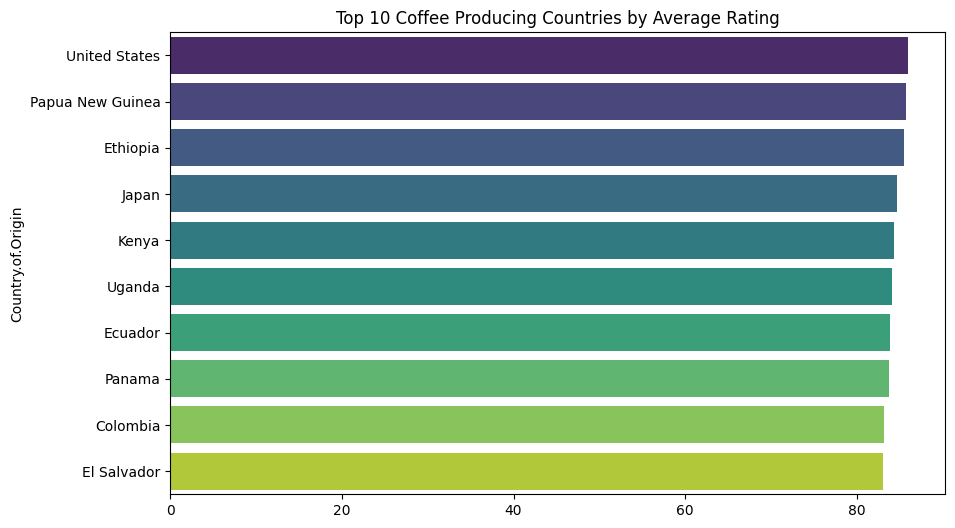

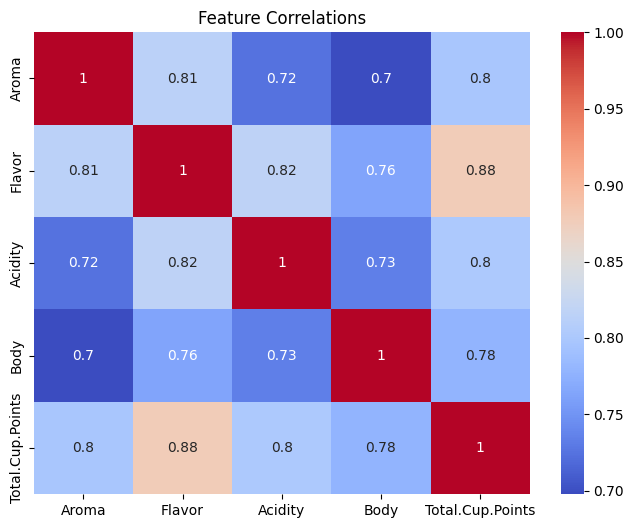

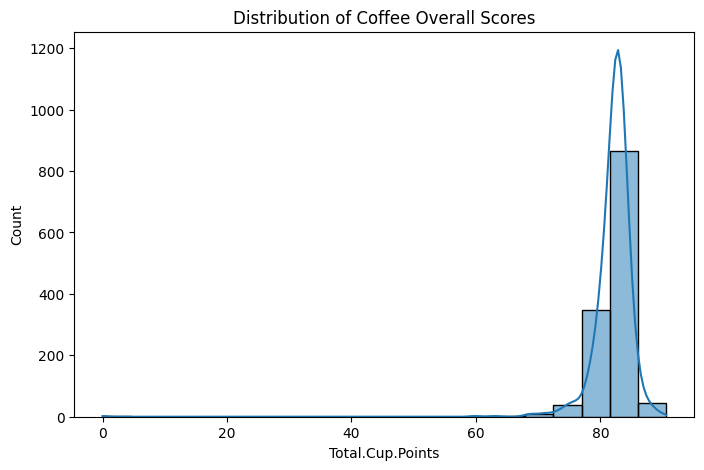

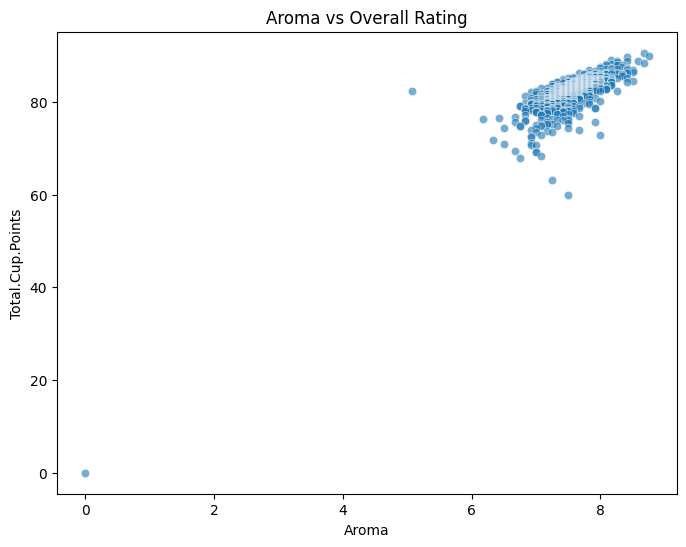

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Top 10 countries by rating
plt.figure(figsize=(10,6))
sns.barplot(x=country_avg.values, y=country_avg.index, palette="viridis")
plt.title("Top 10 Coffee Producing Countries by Average Rating")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Aroma','Flavor','Acidity','Body','Total.Cup.Points']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

# Histogram of Overall scores
plt.figure(figsize=(8,5))
sns.histplot(df["Total.Cup.Points"], bins=20, kde=True)
plt.title("Distribution of Coffee Overall Scores")
plt.show()

# Scatter: Aroma vs Overall
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Aroma", y="Total.Cup.Points", alpha=0.6)
plt.title("Aroma vs Overall Rating")
plt.show()


## Insights

Based on the analysis:

*   **Top-rated countries (from bar plot):** The bar plot shows that the United States, Papua New Guinea, and Ethiopia have the highest average total cup points among the top 10 countries.
*   **Features most strongly correlated with Overall:** The correlation heatmap indicates that **Flavor** has the strongest positive correlation with Total Cup Points (0.88), followed by Acidity (0.80) and Aroma (0.80). This suggests that these sensory attributes are strong indicators of a coffee's overall quality.
*   **Outliers (unusually low ratings):** While not explicitly visualized as outliers, the histogram of the overall scores shows a distribution primarily centered around the high 70s to low 80s. However, there are some entries with significantly lower scores, including a score of 0.00. These very low scores could be considered outliers and warrant further investigation to understand if they represent actual low-quality coffees or data errors.

## Summary:

### Data Analysis Key Findings

*   The process involved manually adding a title and introduction in a markdown cell at the beginning of the notebook.
*   Section headers were added as markdown cells before the relevant code sections, which also required manual intervention.
*   Explanations for each code cell were added in markdown cells placed directly above the corresponding code.
*   Code formatting was reviewed and found to be consistent, requiring no changes.
*   Comments were successfully added within the code cells to explain specific functionalities.
*   Visualizations were enhanced by adjusting figure sizes, changing color palettes, and adding titles, labels, and grid lines, although a `FutureWarning` related to the `palette` parameter in `seaborn.barplot` was noted.
*   Adding color to markdown cells was identified as a manual task requiring direct editing of the markdown content using HTML or markdown syntax.
*   A final review confirmed the overall consistency and readiness of the notebook.

### Insights or Next Steps

*   While the automated process facilitated many steps, manual editing was necessary for adding and coloring markdown cells, highlighting the limitations of the current automated environment for certain formatting tasks.
*   Future work could involve addressing the `FutureWarning` in the bar plot visualization by explicitly mapping `hue` or using an alternative approach to ensure compatibility with future `seaborn` versions.
